In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from scipy.stats import anderson
import excel

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
df = pd.read_excel("Amazon 2_Raw.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [4]:
df

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825
...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-10-04,MarisLaWare@gmail.com,"United States,Los Angeles,California",Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,15.2208
3199,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
3200,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.576,2,19.3932
3201,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200


In [5]:
serie_list = df.Geography.map(lambda x: x.split(","))

In [6]:
countries = []
states = []
county = []

for list in serie_list:
    countries.append(list[0])
    states.append(list[2])
    county.append(list[1])

serie_countries = pd.Series(countries, name="Country")
serie_states = pd.Series(states, name="State")
serie_county = pd.Series(county, name="County")

In [7]:
df2 = pd.concat([df, serie_countries, serie_states, serie_county], axis=1)

df2.drop("Geography", axis=1, inplace=True)

df2.head(20)

,Order ID,Order Date,Ship Date,EmailID,Category,Product Name,Sales,Quantity,Profit,Country,State,County
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,United States,California,Los Angeles
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,United States,California,Los Angeles
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,Art,Newell 322,7.280,4,1.9656,United States,California,Los Angeles
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,United States,California,Los Angeles
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,United States,California,Los Angeles
5,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,34.4700,United States,California,Los Angeles
6,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,85.3092,United States,California,Los Angeles
7,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,Phones,Konftel 250 ConferenceÂ phoneÂ - Charcoal black,911.424,4,68.3568,United States,California,Los Angeles
8,CA-2013-161389,2013-12-06,2013-12-11,IreneMaddox@gmail.com,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922,United States,Washington,Seattle
9,CA-2011-167164,2011-05-13,2011-05-15,AlejandroGrove@gmail.com,Storage,Fellowes Super Stor/Drawer,55.500,2,9.9900,United States,Utah,West Jordan


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Category      3203 non-null   object        
 5   Product Name  3203 non-null   object        
 6   Sales         3203 non-null   float64       
 7   Quantity      3203 non-null   int64         
 8   Profit        3203 non-null   float64       
 9   Country       3203 non-null   object        
 10  State         3203 non-null   object        
 11  County        3203 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 300.4+ KB


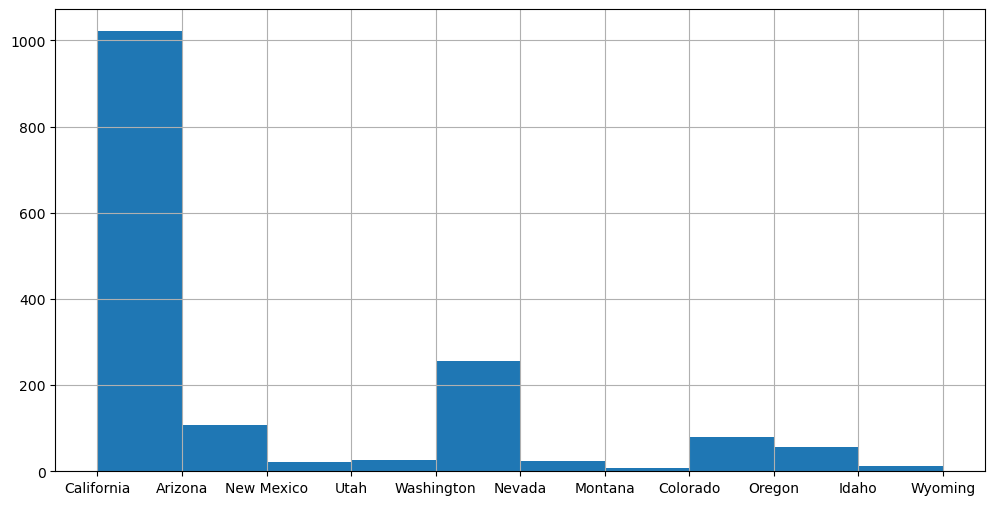

In [9]:
(df2[["Order ID", "State"]].groupby("Order ID").first()).State.hist()

plt.savefig("histStates.png")

In [10]:
df3 = df2[["Category", "Product Name", "Quantity", "Profit"]].groupby(["Category", "Product Name"]).sum()

df3

Quantity  \
Category    Product Name                                                   
Accessories AmazonBasics 3-Button USB Wired Mouse                      2   
            Anker Ultra-Slim Mini Bluetooth 3.0 Wireless Ke...         3   
            Belkin F8E887 USB Wired Ergonomic Keyboard                 3   
            Belkin Standard 104 key USB Keyboard                      13   
            Case Logic 2.4GHz Wireless Keyboard                        8   
...                                                                  ...   
Tables      Lesro Sheffield Collection Coffee Table, End Ta...        25   
            Riverside Furniture Oval Coffee Table, Oval End...         1   
            SAFCO PlanMaster Boards, 60w x 37-1/2d, White M...        13   
            SAFCO PlanMaster Heigh-Adjustable Drafting Tabl...         5   
            Safco Drafting Table                                       4   

                                                                  Profit  
Category    Product Name                                                  
Accessories AmazonBasics 3-Button USB Wired Mouse                 6.0114  
            Anker Ultra-Slim Mini Bluetooth 3.0 Wireless Ke...   13.7931  
            Belkin F8E887 USB Wired Ergonomic Keyboard            6.8977  
            Belkin Standard 104 key USB Keyboard                 10.9425  
            Case Logic 2.4GHz Wireless Keyboard                 -27.9944  
...                                                                  ...  
Tables      Lesro Sheffield Collection Coffee Table, End Ta...  -53.5275  
            Riverside Furniture Oval Coffee Table, Oval End...   63.1070  
            SAFCO PlanMaster Boards, 60w x 37-1/2d, White M... -155.0298  
            SAFCO PlanMaster Heigh-Adjustable Drafting Tabl...  629.0100  
            Safco Drafting Table                                 39.7488  

[1503 rows x 2 columns]

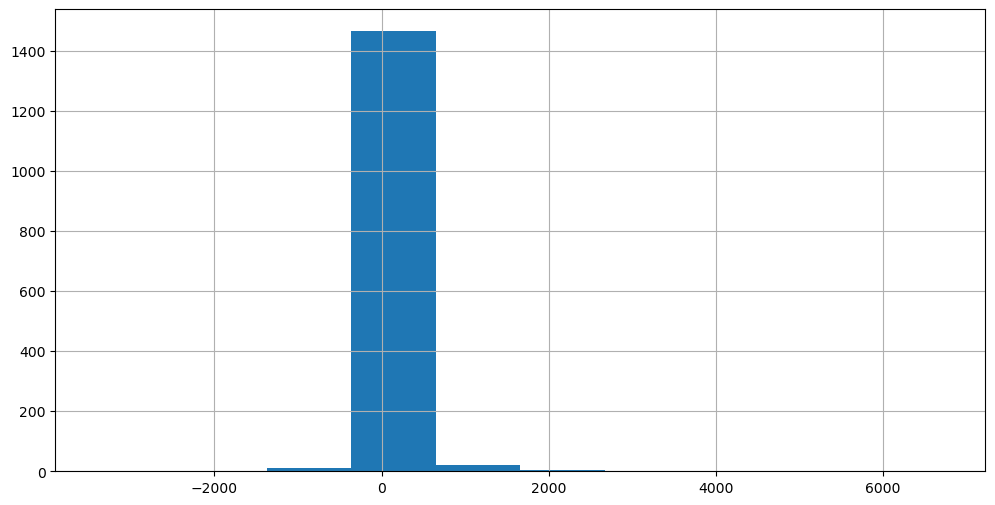

In [11]:
profit = (df2[["Category", "Product Name", "Quantity", "Profit"]].groupby(["Category", "Product Name"]).sum()).Profit

profit.hist()

plt.savefig("histProfit.png")

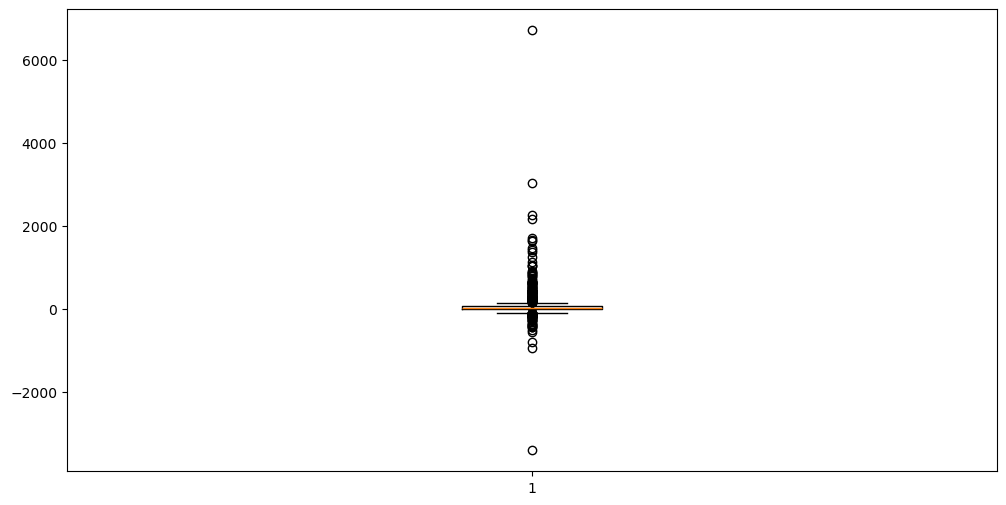

In [12]:
plt.boxplot(profit)

plt.savefig("boxplotProfit.png")

In [13]:
quantiles = profit.quantile([.25, .50, .75])

quantiles

0.25     7.20765
0.50    22.91520
0.75    68.30730
Name: Profit, dtype: float64

In [14]:
iqr = quantiles[0.75] - quantiles[0.25]

minimum = quantiles[0.25] - 1.5 * iqr
maximun = quantiles[0.75] + 1.5 * iqr

print(f"Minimum is: {minimum}")
print(f"Maximun is: {maximun}")

Minimum is: -84.441825
Maximun is: 159.956775


In [15]:
tf = (profit < minimum) | (profit > maximun)

filtered_profit = profit[~tf]

filtered_profit

Category     Product Name                                                                  
Accessories  AmazonBasics 3-Button USB Wired Mouse                                              6.0114
             Anker Ultra-Slim Mini Bluetooth 3.0 Wireless Keyboard                             13.7931
             Belkin F8E887 USB Wired Ergonomic Keyboard                                         6.8977
             Belkin Standard 104 key USB Keyboard                                              10.9425
             Case Logic 2.4GHz Wireless Keyboard                                              -27.9944
                                                                                                ...   
Tables       Laminate Occasional Tables                                                       -46.2390
             Lesro Round Back Collection Coffee Table, End Table                               65.7180
             Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corne

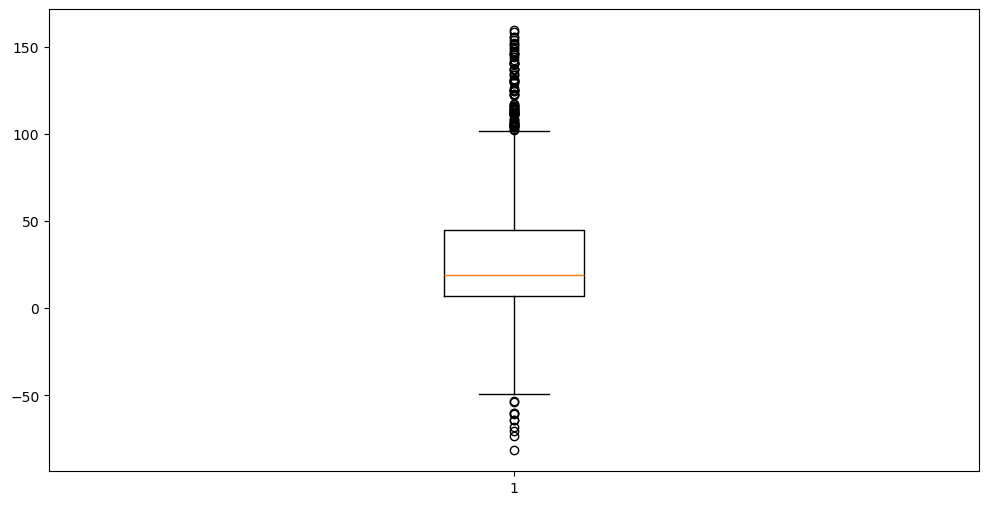

In [16]:
plt.boxplot(filtered_profit)

plt.savefig("boxplotFilteredProfit")

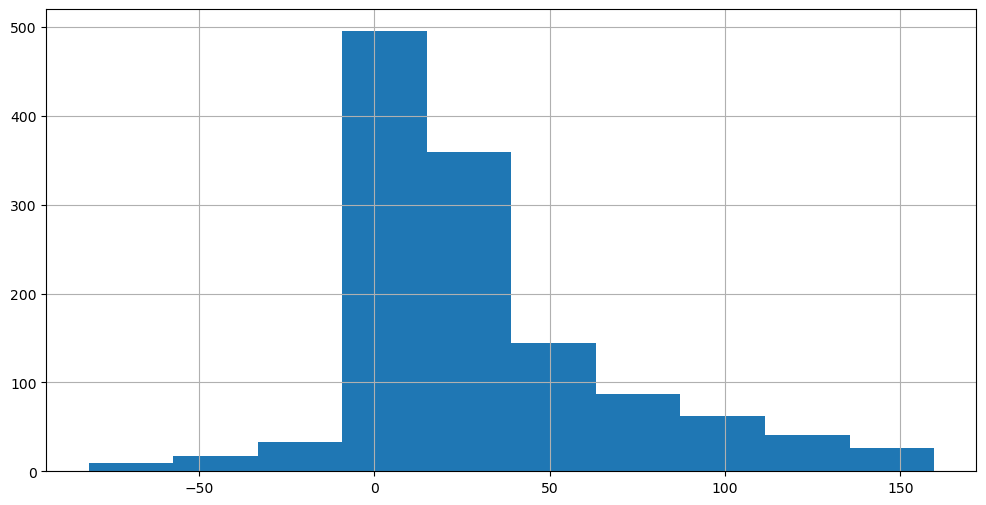

In [17]:
filtered_profit.hist()

plt.savefig("histFilteredProfit.png")

In [18]:
df4 = df2.groupby(["State", "County"]).count()

df4

Order ID  Order Date  Ship Date  EmailID  Category  \
State      County                                                              
Arizona    Avondale              6           6          6        6         6   
           Bullhead City         2           2          2        2         2   
           Chandler              7           7          7        7         7   
           Gilbert              15          15         15       15        15   
           Glendale             23          23         23       23        23   
...                            ...         ...        ...      ...       ...   
Washington Renton                3           3          3        3         3   
           Seattle             428         428        428      428       428   
           Spokane               7           7          7        7         7   
           Vancouver             5           5          5        5         5   
Wyoming    Cheyenne              1           1          1        1         1   

                          Product Name  Sales  Quantity  Profit  Country  
State      County                                                         
Arizona    Avondale                  6      6         6       6        6  
           Bullhead City             2      2         2       2        2  
           Chandler                  7      7         7       7        7  
           Gilbert                  15     15        15      15       15  
           Glendale                 23     23        23      23       23  
...                                ...    ...       ...     ...      ...  
Washington Renton                    3      3         3       3        3  
           Seattle                 428    428       428     428      428  
           Spokane                   7      7         7       7        7  
           Vancouver                 5      5         5       5        5  
Wyoming    Cheyenne                  1      1         1       1        1  

[170 rows x 10 columns]

In [19]:
pivot = pd.pivot_table(df2, values="Sales", index="State", columns="Category", aggfunc="sum")

pivot

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,3396.160,774.432,1389.152,2185.353,519.2130,6499.080,NaN,214.52,101.232,2511.648,27.464,965.949,2440.760,7388.776,2590.384,282.528,3995.350
California,37255.010,24175.920,5495.660,28473.168,27558.5215,63079.368,24559.520,3237.34,479.530,19996.480,2899.140,29492.016,16757.950,67964.536,45112.290,15720.950,45430.232
Colorado,2287.992,1367.296,210.624,508.968,1583.5230,8244.816,439.992,75.60,44.520,1957.568,17.960,3313.689,883.216,4924.656,3387.168,1403.400,1457.130
Idaho,89.970,227.840,NaN,71.656,NaN,338.352,NaN,NaN,NaN,432.320,NaN,NaN,172.860,747.528,477.150,NaN,1824.810
Montana,217.440,NaN,NaN,502.368,NaN,NaN,2999.950,NaN,NaN,63.980,14.620,NaN,41.000,445.544,1304.450,NaN,NaN
Nevada,229.550,95.980,214.280,4897.184,141.9600,674.352,NaN,NaN,4.710,463.380,14.940,2396.400,317.780,2511.056,1325.850,86.200,3355.480
New Mexico,1163.800,NaN,276.700,125.632,NaN,1114.192,NaN,28.40,NaN,587.220,18.450,NaN,625.780,534.128,279.660,29.560,NaN
Oregon,1160.304,535.768,461.760,281.064,356.6460,3841.160,NaN,49.52,20.024,468.464,902.112,209.916,953.352,4451.336,1991.120,76.744,1671.860
Utah,194.730,1089.750,100.050,759.592,2699.8000,NaN,1499.950,NaN,10.000,165.170,30.150,NaN,1152.280,615.224,901.580,44.400,1957.380


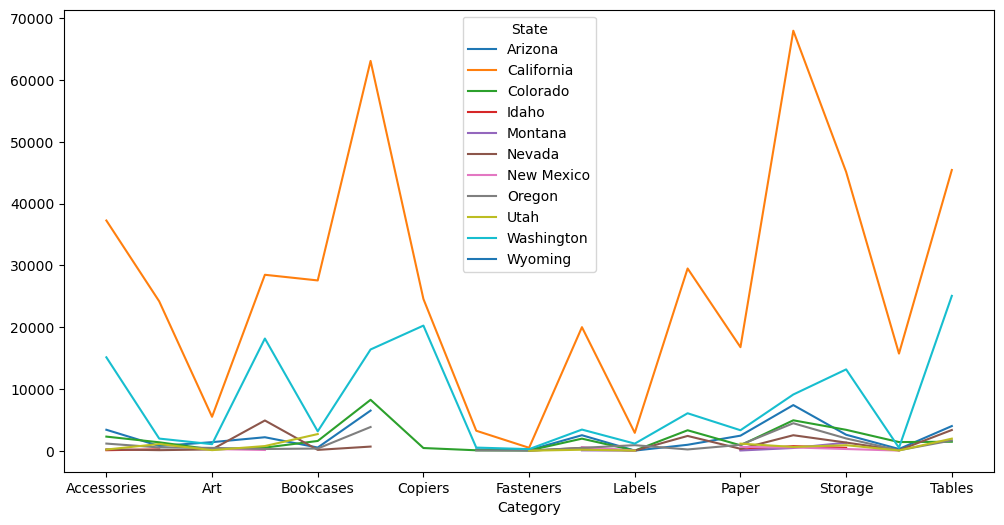

In [20]:
pivot.T.plot()

plt.savefig("categoryByStates.png")

In [21]:
shipping = df2["Ship Date"] - df2["Order Date"]

shipping

0      4 days
1      5 days
2      5 days
3      5 days
4      5 days
        ...  
3198   4 days
3199   5 days
3200   5 days
3201   5 days
3202   5 days
Length: 3203, dtype: timedelta64[ns]

In [22]:
shipping.mean()

Timedelta('3 days 22:19:17.664689353')

In [23]:
time_series = df2[["Order Date", "Sales"]].sort_values("Order Date")

time_series.index = time_series["Order Date"]

time_series.drop("Order Date", axis=1, inplace=True)

time_series

,Sales
Order Date,
2011-01-07,19.440
2011-01-14,333.999
2011-01-14,19.900
2011-01-14,1325.850
2011-01-19,64.864
...,...
2014-12-30,68.460
2014-12-30,393.568
2014-12-31,13.904


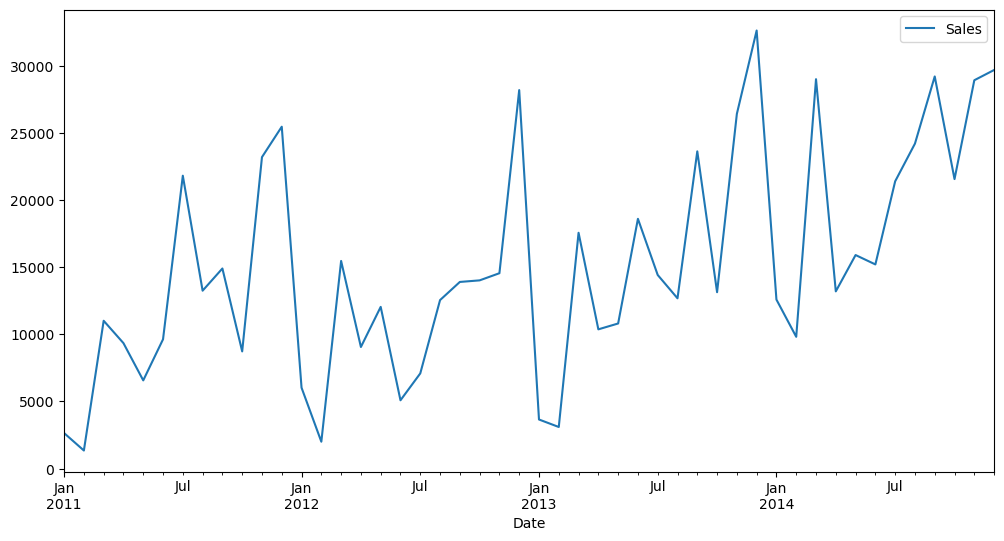

In [24]:
monthly_sells = time_series.resample("M").sum()
monthly_sells.index.name = "Date"

monthly_sells.plot()

plt.savefig("sellsTimeSeries.png")

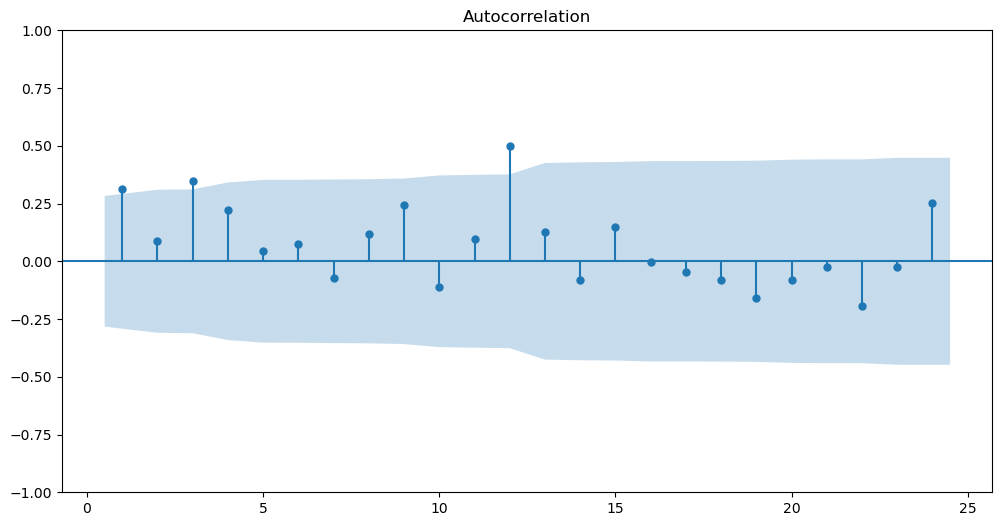

In [25]:
fig = tsaplots.plot_acf(monthly_sells, lags=24, zero=False)

plt.savefig("ACFSells.png")

plt.show()

C:\Users\isDev\anaconda3\envs\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


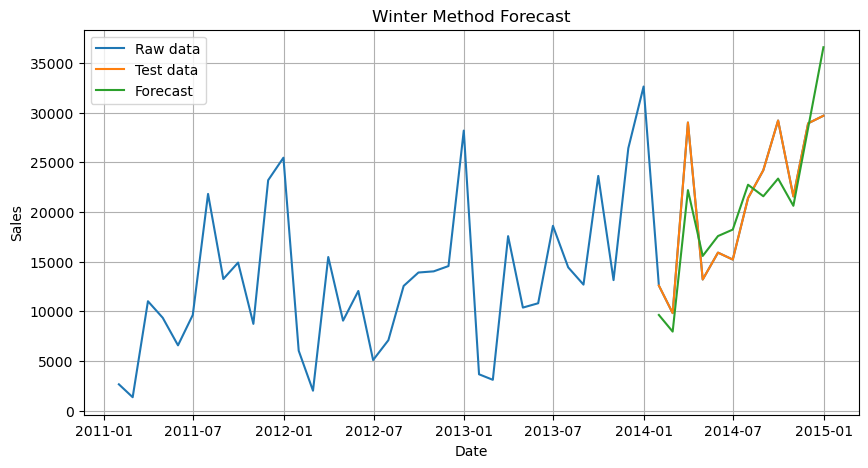

In [26]:
train = monthly_sells.iloc[:-12]
test = monthly_sells.iloc[-12:]

model = ExponentialSmoothing(train, seasonal_periods=12, trend="add", seasonal="add")
fit_model = model.fit()

forecast = fit_model.forecast(12)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sells.index, monthly_sells.Sales, label="Raw data")
plt.plot(test.index, test.Sales, label="Test data")
plt.plot(test.index, forecast, label="Forecast")
plt.title("Winter Method Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)

plt.savefig("forecastingSells.png")

plt.show()

In [27]:
residuals = test.Sales - forecast

residuals

Date
2014-01-31    2957.567935
2014-02-28    1861.763937
2014-03-31    6805.192560
2014-04-30   -2370.900300
2014-05-31   -1666.776963
2014-06-30   -3017.151181
2014-07-31   -1342.132735
2014-08-31    2623.676687
2014-09-30    5846.951487
2014-10-31     941.987391
2014-11-30     464.851165
2014-12-31   -6895.650552
Freq: M, dtype: float64

<Axes: >

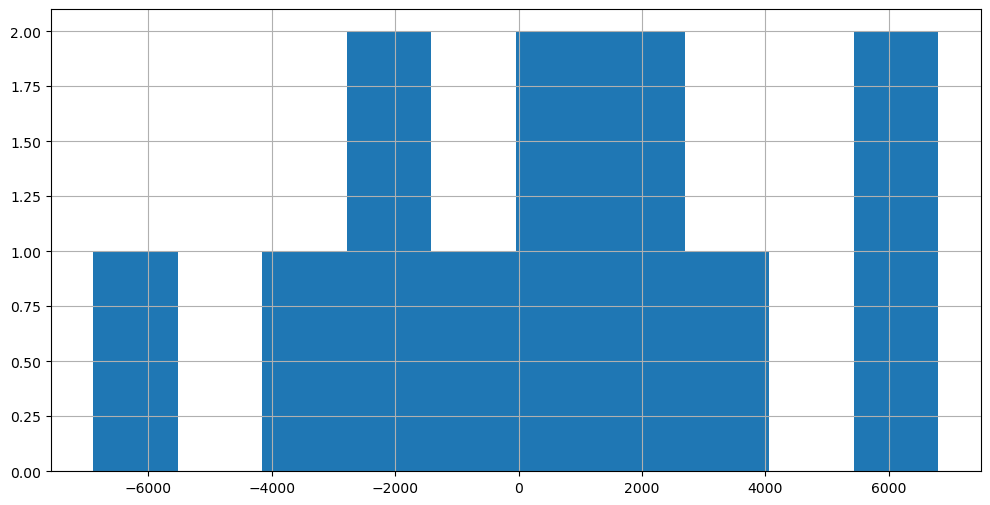

In [28]:
residuals.hist()

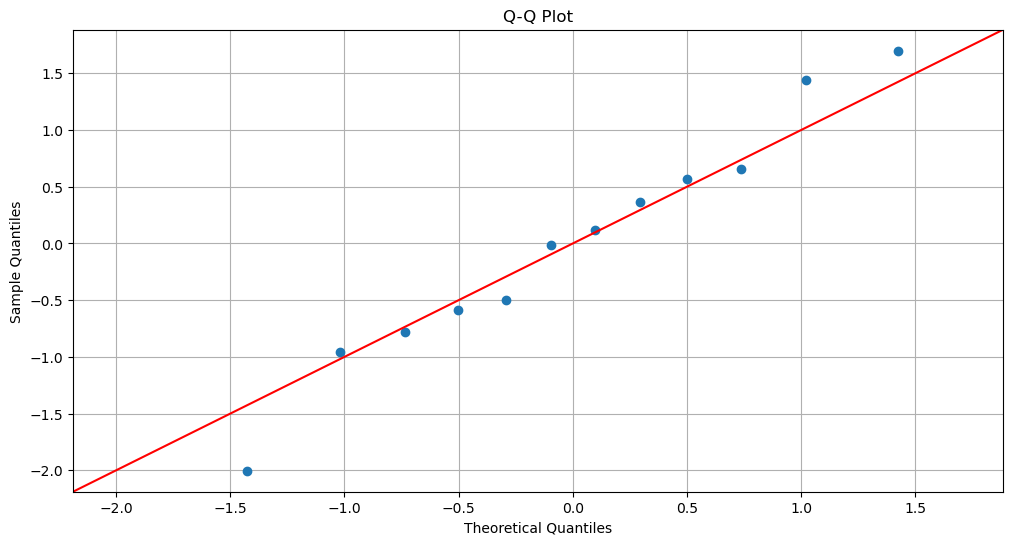

In [29]:
sm.qqplot(residuals, line="45", fit=True)
plt.title('Q-Q Plot')
plt.grid(True)

plt.savefig("QQPlot.png")

plt.show()

In [30]:
result = anderson(residuals.values)

print("Anderson-Darling Statistics:", result.statistic)
print("Critical Values:", result.critical_values)
print("Significant Level:", result.significance_level)

alpha = 0.05
if result.statistic < result.critical_values[2]:
    print("The null hypothesis is not rejected. The data appears to come from a normal distribution.")
else:
    print("The null hypothesis is rejected. The data does not appear to come from a normal distribution.")

Anderson-Darling Statistics: 0.15781769293876557
Critical Values: [0.497 0.566 0.679 0.792 0.942]
Significant Level: [15.  10.   5.   2.5  1. ]
The null hypothesis is not rejected. The data appears to come from a normal distribution.


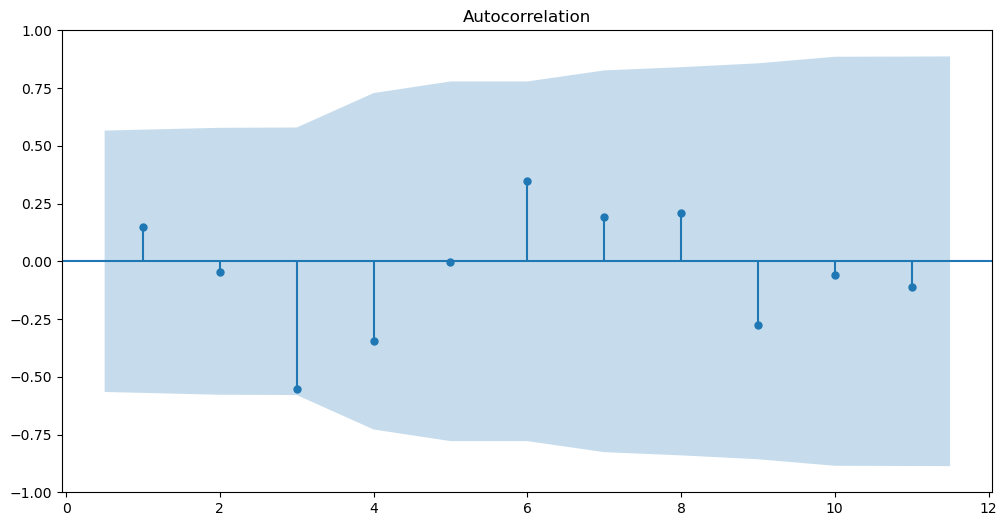

In [31]:
fig = tsaplots.plot_acf(residuals, zero=False)

plt.savefig("ACF.png")

plt.show()

In [32]:
# mean absolute deviation
mad = (1 / len(residuals)) * np.sum(np.abs(residuals))

# mean squared error
mse = (1 / len(residuals)) * np.sum((residuals) ** 2)

# root mean squared error
rmse = np.sqrt(mse)

# mean absolute percent error
mape = (1 / len(residuals)) * np.sum(np.abs(residuals / test.Sales)) * 100

# mean percent error
mpe = (1 / len(residuals)) * np.sum(residuals / test.Sales) * 100

In [33]:
errors = pd.DataFrame(
    {
        "MAD": [mad],
        "MSE": [mse],
        "RMSE": [rmse],
        "MAPE": [mape],
        "MPE": [mpe]
    }
)

errors

,MAD,MSE,RMSE,MAPE,MPE
0,3066.216908,1.396265e+07,3736.662933,15.048858,2.081814


In [34]:
# writing the excel file

from openpyxl.drawing.image import Image
from openpyxl.styles import Font, colors
from openpyxl.styles.borders import Border, Side
from openpyxl.styles.alignment import Alignment
from openpyxl.styles.fills import PatternFill
from openpyxl.formatting.rule import ColorScaleRule

try: 
    with pd.ExcelWriter("test.xlsx", engine="openpyxl") as writer:
        df.to_excel(writer, "Original")
        df2.to_excel(writer, "Clean Data", index=False)
        df3.to_excel(writer, "Qty-Profit")
        df4.to_excel(writer, "State-County")
        df5 = pd.DataFrame({profit.name: profit})
        df5.to_excel(writer, "Profit")
        df6 = pd.DataFrame({filtered_profit.name: filtered_profit})
        df6.to_excel(writer, "Filtered Profit")
        pivot.to_excel(writer, "Pivot")
        monthly_sells.to_excel(writer, "Time Series Sells")

        font_format = Font(color="FFFFFF", bold=True)
        pattern_fill = PatternFill(fgColor="000000", fill_type="solid")
        color_rule = ColorScaleRule(start_type="num", start_value=pivot.min().min(), start_color="FFFF00",
                                   mid_type="num", mid_value=pivot.median().median(), mid_color="FFA500",
                                   end_type="num", end_value=pivot.max().max(), end_color="FF0000")    
        
        workbook = writer.book
        
        sheet = writer.sheets["Clean Data"]
        for column in range(1, len(df2.columns) + 1):
            sheet.cell(row=1, column=column).font = font_format
            sheet.cell(row=1, column=column).fill = pattern_fill
            
        sheet2 = writer.sheets["Profit"]
        for column in range(1, 4):
            sheet2.cell(row=1, column=column).font = font_format
            sheet2.cell(row=1, column=column).fill = pattern_fill

        for row in range(1, len(df5) + 1):
            sheet2.cell(row=row, column=1).font = font_format
            sheet2.cell(row=row, column=1).fill = pattern_fill
            sheet2.cell(row=row, column=2).font = font_format
            sheet2.cell(row=row, column=2).fill = pattern_fill
        
        sheet3 = writer.sheets["Filtered Profit"]
        for column in range(1, 4):
            sheet3.cell(row=1, column=column).font = font_format
            sheet3.cell(row=1, column=column).fill = pattern_fill

        for row in range(1, len(df6) + 1):
            sheet3.cell(row=row, column=1).font = font_format
            sheet3.cell(row=row, column=1).fill = pattern_fill
            sheet3.cell(row=row, column=2).font = font_format
            sheet3.cell(row=row, column=2).fill = pattern_fill
        
        sheet4 = writer.sheets["Pivot"]
        for column in range(1, len(pivot.columns) + 2):
            sheet4.cell(row=1, column=column).font = font_format
            sheet4.cell(row=1, column=column).fill = pattern_fill

        for row in range(1, len(pivot) + 2):
            sheet4.cell(row=row, column=1).font = font_format
            sheet4.cell(row=row, column=1).fill = pattern_fill

        sheet4.conditional_formatting.add("B2:R12", color_rule)
            
        sheet5 = writer.sheets["Time Series Sells"]
        for column in range(1, 3):
            sheet5.cell(row=1, column=column).font = font_format
            sheet5.cell(row=1, column=column).fill = pattern_fill

        sheet6 = writer.sheets["Qty-Profit"]
        for column in range(1, 5):
            sheet6.cell(row=1, column=column).font = font_format
            sheet6.cell(row=1, column=column).fill = pattern_fill

        for row in range(1, len(df3)):
            sheet6.cell(row=row, column=1).font = font_format
            sheet6.cell(row=row, column=1).fill = pattern_fill
            sheet6.cell(row=row, column=2).font = font_format
            sheet6.cell(row=row, column=2).fill = pattern_fill

        sheet7 = writer.sheets["State-County"]
        for column in range(1, 13):
            sheet7.cell(row=1, column=column).font = font_format
            sheet7.cell(row=1, column=column).fill = pattern_fill

        for row in range(1, len(df4)):
            sheet7.cell(row=row, column=1).font = font_format
            sheet7.cell(row=row, column=1).fill = pattern_fill
            sheet7.cell(row=row, column=2).font = font_format
            sheet7.cell(row=row, column=2).fill = pattern_fill
        
        sheet.add_image(Image("histStates.png"), "O1")    
        sheet2.add_image(Image("histProfit.png"), "D1")
        sheet2.add_image(Image("boxplotProfit.png"), "D33")
        sheet3.add_image(Image("boxplotFilteredProfit.png"), "D1")
        sheet3.add_image(Image("histFilteredProfit.png"), "D33")
        sheet4.add_image(Image("categoryByStates.png"), "S1")
        sheet5.add_image(Image("sellsTimeSeries.png"), "D1")
        sheet5.add_image(Image("ACFSells.png"), "D33")
        sheet5.add_image(Image("forecastingSells.png"), "D66")
        sheet5.add_image(Image("QQPlot.png"), "D99")
        sheet5.add_image(Image("ACF.png"), "D132")

        print("Excel file was created!")
except Exception as ex:
    print(f"{ex}")

Excel file was created!
